In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df=pd.read_csv('churn_data_modified.csv')
df.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,0,0,1,0,0,1,29.85,29.85,0,...,0,0,1,0,1,0,0,0,0,0
1,1,1,0,0,0,1,0,56.95,1889.50,0,...,0,0,0,1,0,0,1,0,0,0
2,2,1,0,0,0,1,1,53.85,108.15,1,...,0,0,0,1,1,0,0,0,0,0
3,3,1,0,0,0,0,0,42.30,1840.75,0,...,1,0,0,0,0,0,0,1,0,0
4,4,0,0,0,0,1,1,70.70,151.65,1,...,0,0,1,0,1,0,0,0,0,0


In [3]:
df=df.drop('Unnamed: 0',axis=1)

In [4]:
## Creating X and y Variable:

X=df.drop('Churn',axis=1)
y=df['Churn']

In [5]:
len(X),len(y)

(7032, 7032)

In [6]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [7]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5625, 45), (1407, 45), (5625,), (1407,))

In [8]:
# DECISION TREES:

from sklearn.tree import DecisionTreeClassifier

model_dt=DecisionTreeClassifier(criterion='gini',random_state=42,min_samples_leaf=8)

In [9]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=8, random_state=42)

In [10]:
y_preds=model_dt.predict(X_test)

In [11]:
y_preds

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [12]:
from sklearn.metrics import classification_report,accuracy_score,r2_score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1038
           1       0.57      0.48      0.52       369

    accuracy                           0.77      1407
   macro avg       0.69      0.67      0.68      1407
weighted avg       0.76      0.77      0.76      1407



In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_preds)

array([[903, 135],
       [193, 176]], dtype=int64)

In [14]:
## Inorder to resuce the false positive and False Negatives:
import warnings
warnings.filterwarnings('ignore')

from imblearn.combine import SMOTEENN

In [15]:
sc=SMOTEENN(random_state=42)
X_resample,y_resample=sc.fit_resample(X,y)

In [16]:
X_retrain,X_retest,y_retrain,y_retest=train_test_split(X_resample,y_resample,test_size=0.2,random_state=42)

In [17]:
# Again done the Hyperparameter tuning:

model_sc=DecisionTreeClassifier(criterion='gini',max_features=2,min_samples_split=8,random_state=42)

In [18]:
model_sc.fit(X_retrain,y_retrain)

DecisionTreeClassifier(max_features=2, min_samples_split=8, random_state=42)

In [19]:
y_pred=model_sc.predict(X_retest)

In [20]:
print(classification_report(y_retest,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       549
           1       0.94      0.92      0.93       631

    accuracy                           0.92      1180
   macro avg       0.92      0.92      0.92      1180
weighted avg       0.92      0.92      0.92      1180



In [21]:
confusion_matrix(y_pred,y_retest)

array([[510,  53],
       [ 39, 578]], dtype=int64)

In [22]:
model_sc.score(X_retest,y_retest)

0.9220338983050848

In [23]:
accuracy_score(y_pred,y_retest)

0.9220338983050848

In [24]:
## Random forest Classifier::

from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier(n_estimators=100,criterion='gini',random_state=100,max_depth=6,min_samples_split=8)


In [25]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_split=8, random_state=100)

In [26]:
y_pred_rf=rf_model.predict(X_test)

In [27]:
print(classification_report(y_pred_rf,y_test))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1154
           1       0.45      0.65      0.53       253

    accuracy                           0.79      1407
   macro avg       0.68      0.74      0.70      1407
weighted avg       0.83      0.79      0.81      1407



In [28]:
confusion_matrix(y_pred_rf,y_test)

array([[950, 204],
       [ 88, 165]], dtype=int64)

In [29]:
## Fit again with SMOTE :

rf_model.fit(X_retrain,y_retrain)

RandomForestClassifier(max_depth=6, min_samples_split=8, random_state=100)

In [30]:
y_preds_rf=rf_model.predict(X_retest)

In [31]:
print(classification_report(y_preds_rf,y_retest))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       529
           1       0.94      0.91      0.92       651

    accuracy                           0.91      1180
   macro avg       0.91      0.91      0.91      1180
weighted avg       0.91      0.91      0.91      1180



In [32]:
confusion_matrix(y_preds_rf,y_retest)

array([[488,  41],
       [ 61, 590]], dtype=int64)

In [33]:
accuracy_score(y_preds_rf,y_retest)

0.9135593220338983

In [34]:
## SVC

In [35]:
from sklearn.svm import SVC

In [36]:
clf_svc=SVC(random_state=42,kernel='linear')

In [37]:
clf_svc.fit(X_retrain,y_retrain)

SVC(kernel='linear', random_state=42)

In [38]:
y_preds_clf=clf_svc.predict(X_retest)

In [39]:
print(classification_report(y_preds_clf,y_retest))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       553
           1       0.93      0.94      0.93       627

    accuracy                           0.93      1180
   macro avg       0.93      0.93      0.93      1180
weighted avg       0.93      0.93      0.93      1180



In [40]:
accuracy_score(y_preds_clf,y_retest)

0.9305084745762712

In [41]:
## Logistic Regression:

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
logreg=LogisticRegression(random_state=42)
logreg.fit(X_retrain,y_retrain)


LogisticRegression(random_state=42)

In [44]:
# Hyperparamter tuning:
params_grid={
    'C': np.logspace(-3,6,12),  
    'max_iter':[10,20,30,40,100],
    'n_jobs':[0,-1]
}

In [45]:
from sklearn.model_selection import GridSearchCV
gs_logreg=GridSearchCV(estimator=logreg,param_grid=params_grid,verbose=True,cv=5)

In [46]:
gs_logreg.fit(X_retrain,y_retrain)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': array([1.00000000e-03, 6.57933225e-03, 4.32876128e-02, 2.84803587e-01,
       1.87381742e+00, 1.23284674e+01, 8.11130831e+01, 5.33669923e+02,
       3.51119173e+03, 2.31012970e+04, 1.51991108e+05, 1.00000000e+06]),
                         'max_iter': [10, 20, 30, 40, 100], 'n_jobs': [0, -1]},
             verbose=True)

In [47]:
gs_logreg.best_params_

{'C': 533.6699231206312, 'max_iter': 100, 'n_jobs': -1}

In [48]:
y_pred_log=gs_logreg.predict(X_retest)

In [49]:
y_pred_log

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

<AxesSubplot:xlabel='Churn', ylabel='Density'>

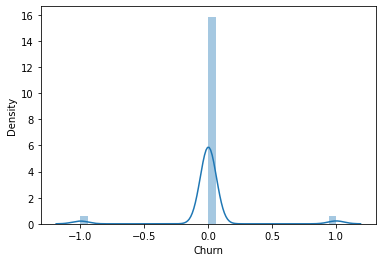

In [50]:
sns.distplot(y_retest-y_pred_log)

In [51]:
import pickle

In [52]:
filename='model.random_rf.pkl'

In [53]:
pickle.dump(rf_model,open(filename,'wb'))

In [54]:
load_model=pickle.load(open(filename,'rb'))

In [55]:
load_model.score(X_retest,y_retest)

0.9135593220338983

In [56]:
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (auto

In [85]:
data = [['inputQuery1', 'inputQuery2', 'inputQuery3', 'inputQuery4', 'inputQuery5', 'inputQuery6', 'inputQuery7',
             'inputQuery8', 'inputQuery9', 'inputQuery10', 'inputQuery11', 'inputQuery12', 'inputQuery13', 'inputQuery14',
             'inputQuery15', 'inputQuery16', 'inputQuery17', 'inputQuery18', 'inputQuery19']]

new_df = pd.DataFrame(data, columns=['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'gender',
                                         'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                                         'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                         'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                                         'PaymentMethod', 'tenure'])

In [83]:
new_df

,SeniorCitizen,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure
0,inputQuery1,inputQuery2,inputQuery3,inputQuery4,inputQuery5,inputQuery6,inputQuery7,inputQuery8,inputQuery9,inputQuery10,inputQuery11,inputQuery12,inputQuery13,inputQuery14,inputQuery15,inputQuery16,inputQuery17,inputQuery18,inputQuery19
